# Final Comparisons

In [46]:
# Imports + path setup
import os
import sys
from pathlib import Path

# Make project root importable
PROJECT_ROOT = Path.cwd().resolve().parents[0]
if (PROJECT_ROOT / "src").exists():
    sys.path.insert(0, str(PROJECT_ROOT))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
DATA_DIR = PROJECT_ROOT / "data"
RESULTS_DIR = PROJECT_ROOT / "results"
TABLES_DIR = RESULTS_DIR / "tables"
FIG_DIR = RESULTS_DIR / "figures" / "kernel_ridge_regression"

TABLES_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)

In [ ]:
df_krr = pd.read_csv(TABLES_DIR / "krr_results.csv")
df_lr = pd.read_csv(TABLES_DIR / "lr_results.csv")

,model,kernel,representation,best_gamma,test_rmse,test_mae,cv_rmse_mean_at_best,cv_rmse_std_at_best,cv_mae_mean_at_best,cv_mae_std_at_best
0,local_regression,rbf,scaled,0.01,15.314159,11.106052,16.332542,0.886078,11.836233,0.710500
1,local_regression,laplacian,scaled,0.10,13.991014,8.949406,15.440027,1.166236,10.131029,0.827083
2,local_regression,rbf,pca,0.10,15.118897,9.821704,16.175607,1.016083,10.824277,0.576926
3,local_regression,laplacian,pca,0.10,17.463844,12.493910,17.790869,0.769063,13.116841,0.534864


### Plotting functions

In [48]:
def plot_cv_vs_test_comparison(results_df, title_suffix=""):
    # Reshape the data for side-by-side plotting
    df_melted = results_df.melt(
        id_vars=['kernel', 'representation'], 
        value_vars=['cv_mae_mean_at_best', 'test_mae'],
        var_name='Metric', value_name='MAE'
    )
    
    # Rename labels for the legend
    df_melted['Metric'] = df_melted['Metric'].replace({
        'cv_mae_mean_at_best': 'CV MAE (Expected)',
        'test_mae': 'Test MAE (Actual)'
    })

    plt.figure(figsize=(12, 6))
    
    # Split by representation (Scaled vs PCA) using
    # This creates two plots side-by-side
    g = sns.catplot(
        data=df_melted, kind="bar",
        x="kernel", y="MAE", hue="Metric",
        col="representation", palette="muted", height=5
    )
    
    g.set_axis_labels("", "Mean Absolute Error")
    g.set_titles("{col_name} Representation")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{title_suffix}: Training vs. Test Performance",
                   fontsize=16, fontweight='bold')
    
    plt.savefig(FIG_DIR / f"{title_suffix.lower().replace(' ', '_')}_cv_vs_test_comparison.png", dpi=200)
    plt.show()

def plot_lr_vs_krr_comparison(df_krr, df_lr):
    # Merge the two dataframes on kernel and representation
    merged_df = pd.merge(
        df_krr, df_lr,
        on=['kernel', 'representation'],
        suffixes=('_krr', '_lr')
    )
    
    # Reshape for plotting
    df_melted = merged_df.melt(
        id_vars=['kernel', 'representation'],
        value_vars=['test_mae_krr', 'test_mae_lr'],
        var_name='Model', value_name='Test MAE'
    )
    
    # Rename labels for the legend
    df_melted['Model'] = df_melted['Model'].replace({
        'test_mae_krr': 'Kernel Ridge Regression',
        'test_mae_lr': 'Local Regression'
    })
    
    plt.figure(figsize=(12, 6))
    
    # Split by representation (Scaled vs PCA)
    g = sns.catplot(
        data=df_melted, kind="bar",
        x="kernel", y="Test MAE", hue="Model",
        col="representation", palette="muted", height=5
    )
    
    g.set_axis_labels("", "Mean Absolute Error")
    g.set_titles("{col_name} Representation")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle("Kernel Ridge Regression vs. Local Regression: Test Performance",
                   fontsize=16, fontweight='bold')
    
    plt.savefig(FIG_DIR / "lr_vs_krr_comparison.png", dpi=200)
    plt.show()

### Create output plots

<Figure size 1200x600 with 0 Axes>

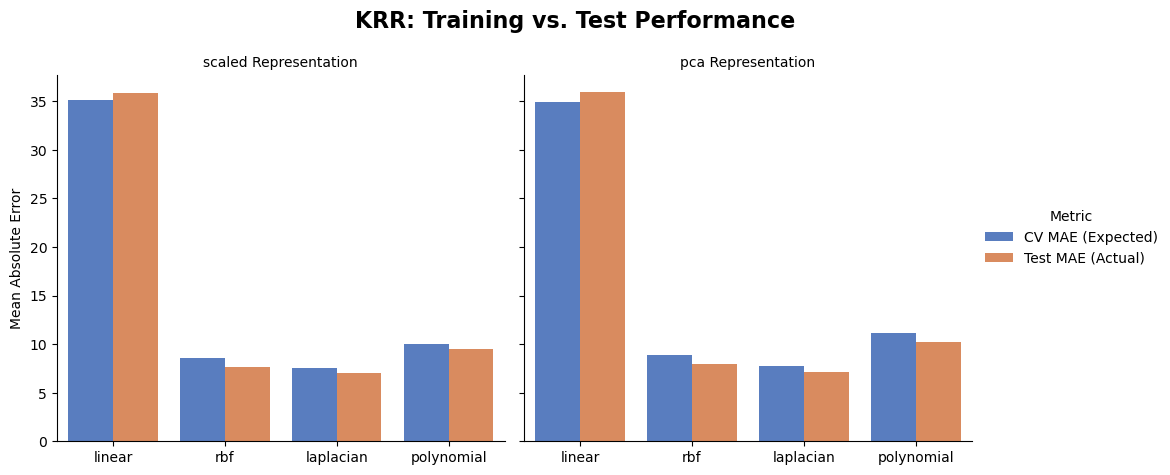

In [49]:
plot_cv_vs_test_comparison(df_krr, "KRR")

<Figure size 1200x600 with 0 Axes>

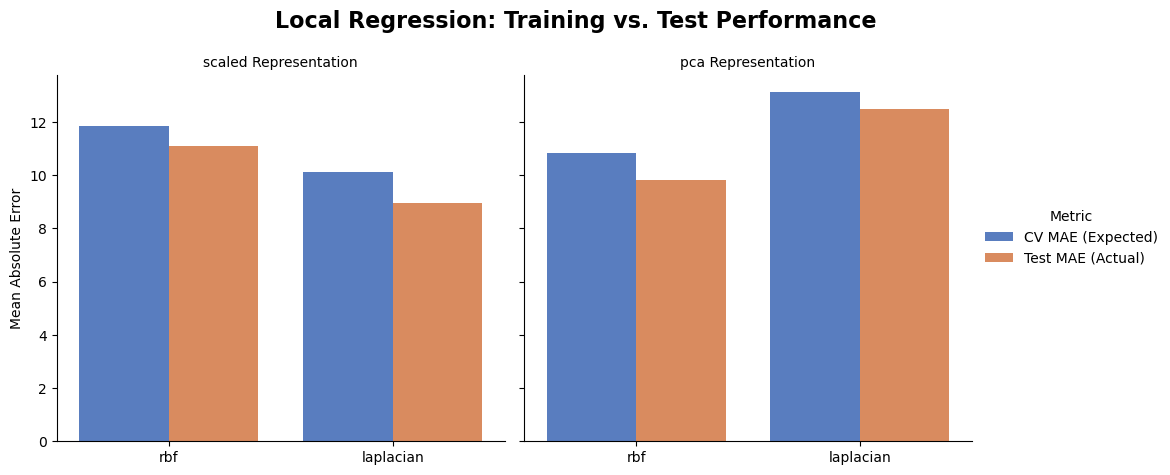

In [54]:
plot_cv_vs_test_comparison(df_lr, "Local Regression")

<Figure size 1200x600 with 0 Axes>

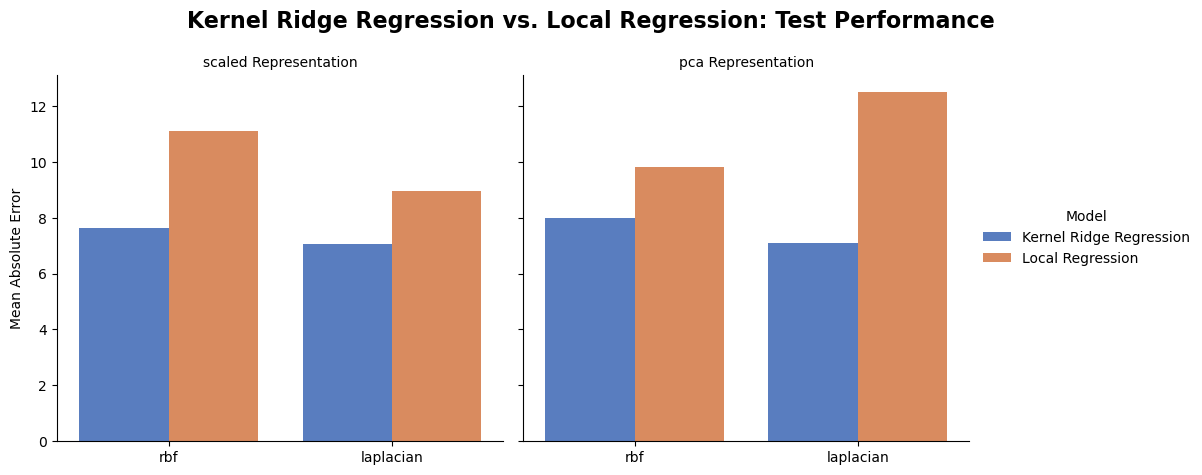

In [53]:
plot_lr_vs_krr_comparison(df_krr, df_lr)